# setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

N = 350

data = make_classification(
    n_samples      = N, 
    n_features    = 9, 
    n_informative = 4, 
    n_classes     = 2,
    flip_y        = 0.5,
    class_sep     = 0.5
)

df      = pd.DataFrame( data[0], columns = [ 'x{}'.format(str(i)) for i in range(len(data[0][1])) ] )
df['y'] = np.random.choice([0, 1], size=(N,), p=[0.75, 0.25])
    
# sns.pairplot(df, plot_kws={'alpha':0.75}, hue='y', diag_kind="hist");

display(df['y'].value_counts(normalize=True))

display(df)

y
0    0.768571
1    0.231429
Name: proportion, dtype: float64

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,-2.379886,2.462844,0.354143,-0.986244,-0.220444,0.907610,-1.096197,0.234149,-0.335504,0
1,-2.499733,-0.303906,-1.279385,-2.216344,1.236461,0.154278,0.379605,-0.045617,-0.452825,0
2,0.955688,0.496804,1.436558,1.251016,-0.223396,0.007484,-0.933035,-1.054053,-0.438645,1
3,-0.889533,-0.997865,0.241247,-0.032683,1.238041,0.439410,-1.489655,-0.654865,0.741006,0
4,1.945429,0.887693,0.202967,0.829576,1.632109,-0.587678,0.363140,0.724064,-0.773824,0
...,...,...,...,...,...,...,...,...,...,...
345,-0.670181,-0.191874,-0.501260,-0.725447,-0.616581,-0.014932,-0.660980,0.154708,-0.208094,0
346,-2.390433,1.120531,-1.014646,-2.697053,0.853636,-0.385482,-0.748249,-0.858356,-2.487285,1
347,-1.799390,1.101780,1.763712,0.344279,-1.015769,1.325023,-1.060064,-0.151718,-0.031117,0
348,1.007953,-2.110177,1.611930,1.540353,0.180854,0.428374,-0.907252,0.528229,-0.196155,0


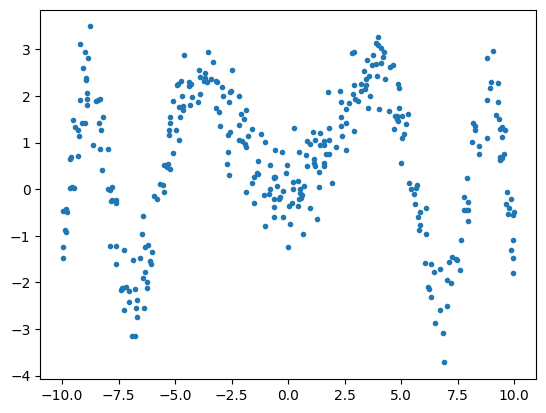

In [2]:
X   = np.random.uniform( -10, 10, N )
y   = 2 * np.exp(1/(np.abs(X)+1)) * np.sin( 0.1 * X**2 ) + 0.5 * np.random.randn( N )
df['x4'] = y

plt.plot(X, y, marker='.', linestyle='None',)

# lightgbm

In [3]:
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc,accuracy_score, confusion_matrix, f1_score, fbeta_score, balanced_accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

X = df.drop('y', axis=1)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [4]:
model = lightgbm.LGBMClassifier(verbose=-1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        52
           1       0.20      0.06      0.09        18

    accuracy                           0.70        70
   macro avg       0.47      0.49      0.45        70
weighted avg       0.60      0.70      0.63        70



# tabpfn

In [6]:
y_prob

array([0.1980773 , 0.21747707, 0.21963671, 0.2139403 , 0.21349455,
       0.19317141, 0.19393867, 0.21064946, 0.21317527, 0.21923849,
       0.20261465, 0.2076066 , 0.20567566, 0.21015736, 0.19751967,
       0.19352098, 0.2114333 , 0.20841421, 0.20380366, 0.21654966,
       0.20617181, 0.21321958, 0.21212824, 0.20866328, 0.20140377,
       0.19851546, 0.20329495, 0.22322623, 0.20172387, 0.19861591,
       0.20202436, 0.20784082, 0.20769046, 0.21673396, 0.21685916,
       0.20947836, 0.20594753, 0.219461  , 0.20595406, 0.22036093,
       0.20065033, 0.20810895, 0.21786599, 0.2152056 , 0.20196792,
       0.19280851, 0.20750539, 0.2163505 , 0.2210077 , 0.2004027 ,
       0.20166327, 0.20486405, 0.21052407, 0.19955637, 0.2204653 ,
       0.21549124, 0.22059087, 0.20944238, 0.19230515, 0.20105937,
       0.21010506, 0.2197906 , 0.20784381, 0.22165146, 0.19595775,
       0.20037618, 0.20312303, 0.20528595, 0.20019051, 0.21187212],
      dtype=float32)

In [7]:
import tabpfn

classifier = tabpfn.TabPFNClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]

print(classification_report(y_test, y_pred))

/opt/venvs/lab/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/venvs/lab/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/venvs/lab/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/venvs/lab/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  war

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        52
           1       0.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.37      0.50      0.43        70
weighted avg       0.55      0.74      0.63        70



/opt/venvs/lab/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/venvs/lab/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/venvs/lab/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


.